¡Hola, Edgar!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Edgar! Has hecho un excelente trabajo con el proyecto, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Gran trabajo con la carga de la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Respuesta:** Observo que el orden de las columnas es distinto al esperado en las indicaciones del proyecto, además de que una de las columnas tiene un nombre ligeramente distinto al esperado, por lo que procederé a cambiarlo.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
new_columns_order = ['plan_name', 'usd_monthly_pay', 'minutes_included', 'messages_included', 'mb_per_month_included', 'usd_per_minute', 'usd_per_message', 'usd_per_gb']
plans_clean = plans[new_columns_order]
new_columns_name = {'usd_monthly_pay':'usd_monthly_fee'}
plans_clean.rename(columns = new_columns_name, inplace = True)
plans_clean.head()

,plan_name,usd_monthly_fee,minutes_included,messages_included,mb_per_month_included,usd_per_minute,usd_per_message,usd_per_gb
0,surf,20,500,50,15360,0.03,0.03,10
1,ultimate,70,3000,1000,30720,0.01,0.01,7


#### Enriquecer los datos

<div class="alert alert-block alert-info">
<b>Respuesta:</b>

Al momento de realizar cálculos, es probable que necesite realizar la conversión de megabytes a gigabytes dividiendo la cantidad de megabytes entre 1024.<a class="tocSkip"></a>


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
users.head(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Respuesta:** Hay varios tipos de datos incorrectos, procederemos a corregirlos. Los datos NaN en la columna *churn_date*, considero que no requieren de una corrección dado que este es justo el dato esperado cuando la tarifa se estaba usando cuando fue extraída esta base de datos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
users['user_id'] = users['user_id'].astype('str')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprime una muestra de datos para las llamadas
calls.head(20)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Respuesta:** Hay varios tipos de datos incorrectos, procederemos a corregirlos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:
calls['user_id'] = calls['user_id'].astype('str')
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


<div class="alert alert-block alert-info">
<b>Comentario:</b>

Se agrega redondeo con np.ceil().<a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [12]:
calls['month'] = calls['call_date'].dt.month
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.3+ MB


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

<div class="alert alert-block alert-info">
<b>Respuesta:</b>

Las llamadas con duración de 0 son aquellas en las que el usuario realizó una llamada pero no hubo respuesta de la persona que llamaron.<a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprime una muestra de datos para los mensajes
messages.head(10)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Respuesta:** Hay varios tipos de datos incorrectos, procederemos a corregirlos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
messages['user_id'] = messages['user_id'].astype('str')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [16]:
messages['month'] = messages['message_date'].dt.month
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet
internet.head(20)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Respuesta:** Hay varios tipos de datos incorrectos, procederemos a corregirlos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
internet['user_id'] = internet['user_id'].astype('str')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['mb_used'] = np.ceil(internet['mb_used'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


<div class="alert alert-block alert-info">
<b>Comentario:</b>

Se agrega redondeo con np.ceil().<a class="tocSkip"></a>

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [20]:
internet['month'] = internet['session_date'].dt.month
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

<div class="alert alert-block alert-info">
<b>Respuesta:</b>

En el dataframe "calls" ya redondeé la duración de la llamada y en el de "internet" he redondeado los megabytes, de igual modo dejé los comentarios correspondientes por favor revisar si quedó bien.<a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [21]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans_clean.head()


,plan_name,usd_monthly_fee,minutes_included,messages_included,mb_per_month_included,usd_per_minute,usd_per_message,usd_per_gb
0,surf,20,500,50,15360,0.03,0.03,10
1,ultimate,70,3000,1000,30720,0.01,0.01,7


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [22]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_by_user_per_month = calls.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_by_user_per_month.rename(columns={'id': 'call_count'}, inplace=True)
print(calls_by_user_per_month)

     user_id  month  call_count
0       1000     12          16
1       1001      8          27
2       1001      9          49
3       1001     10          65
4       1001     11          64
...      ...    ...         ...
2253    1498     12          39
2254    1499      9          41
2255    1499     10          53
2256    1499     11          45
2257    1499     12          65

[2258 rows x 3 columns]



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [23]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_by_user_per_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
minutes_by_user_per_month = minutes_by_user_per_month.sort_values(['user_id', 'month'], ascending=True)
minutes_by_user_per_month.rename(columns={'duration': 'call_duration'}, inplace=True)
print(minutes_by_user_per_month)

     user_id  month  call_duration
0       1000     12          124.0
1       1001      8          182.0
2       1001      9          315.0
3       1001     10          393.0
4       1001     11          426.0
...      ...    ...            ...
2253    1498     12          339.0
2254    1499      9          346.0
2255    1499     10          385.0
2256    1499     11          308.0
2257    1499     12          496.0

[2258 rows x 3 columns]


In [24]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_by_user_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_by_user_per_month.rename(columns={'id': 'message_count'}, inplace=True)
print(messages_by_user_per_month)


     user_id  month  message_count
0       1000     12             11
1       1001      8             30
2       1001      9             44
3       1001     10             53
4       1001     11             36
...      ...    ...            ...
1801    1496      9             21
1802    1496     10             18
1803    1496     11             13
1804    1496     12             11
1805    1497     12             50

[1806 rows x 3 columns]


In [25]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
mb_by_user_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
print(mb_by_user_per_month)


     user_id  month  mb_used
0       1000     12   1903.0
1       1001      8   6929.0
2       1001      9  13333.0
3       1001     10  22356.0
4       1001     11  18524.0
...      ...    ...      ...
2272    1498     12  23160.0
2273    1499      9  13004.0
2274    1499     10  19515.0
2275    1499     11  16834.0
2276    1499     12  22091.0

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [26]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_data_by_month = calls_by_user_per_month.merge(minutes_by_user_per_month, on=['user_id', 'month'], how='left')
user_data_by_month = user_data_by_month.merge(messages_by_user_per_month, on=['user_id', 'month'], how='left')
user_data_by_month = user_data_by_month.merge(mb_by_user_per_month, on=['user_id', 'month'], how='left')
user_data_by_month = user_data_by_month.fillna(0)
user_data_by_month['message_count'] = user_data_by_month['message_count'].astype('int')
print(user_data_by_month)

     user_id  month  call_count  call_duration  message_count  mb_used
0       1000     12          16          124.0             11   1903.0
1       1001      8          27          182.0             30   6929.0
2       1001      9          49          315.0             44  13333.0
3       1001     10          65          393.0             53  22356.0
4       1001     11          64          426.0             36  18524.0
...      ...    ...         ...            ...            ...      ...
2253    1498     12          39          339.0              0  23160.0
2254    1499      9          41          346.0              0  13004.0
2255    1499     10          53          385.0              0  19515.0
2256    1499     11          45          308.0              0  16834.0
2257    1499     12          65          496.0              0  22091.0

[2258 rows x 6 columns]


In [27]:
# Añade la información de la tarifa
user_data_complete = pd.merge(user_data_by_month, users[['user_id', 'plan']], on='user_id', how='left')
print(user_data_complete)

     user_id  month  call_count  call_duration  message_count  mb_used  \
0       1000     12          16          124.0             11   1903.0   
1       1001      8          27          182.0             30   6929.0   
2       1001      9          49          315.0             44  13333.0   
3       1001     10          65          393.0             53  22356.0   
4       1001     11          64          426.0             36  18524.0   
...      ...    ...         ...            ...            ...      ...   
2253    1498     12          39          339.0              0  23160.0   
2254    1499      9          41          346.0              0  13004.0   
2255    1499     10          53          385.0              0  19515.0   
2256    1499     11          45          308.0              0  16834.0   
2257    1499     12          65          496.0              0  22091.0   

          plan  
0     ultimate  
1         surf  
2         surf  
3         surf  
4         surf  
...      

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [29]:
# Calcula el ingreso mensual para cada usuario
monthly_income = pd.merge(user_data_complete, plans, left_on='plan', right_on='plan_name', how='left')
monthly_income['gb_used'] = monthly_income['mb_used'] / 1024
monthly_income['gb_used'] = np.ceil(monthly_income['gb_used'])
monthly_income.head(5)

,user_id,month,call_count,call_duration,message_count,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_used
0,1000,12,16,124.0,11,1903.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,2.0
1,1001,8,27,182.0,30,6929.0,surf,50,15360,500,20,10,0.03,0.03,surf,7.0
2,1001,9,49,315.0,44,13333.0,surf,50,15360,500,20,10,0.03,0.03,surf,14.0
3,1001,10,65,393.0,53,22356.0,surf,50,15360,500,20,10,0.03,0.03,surf,22.0
4,1001,11,64,426.0,36,18524.0,surf,50,15360,500,20,10,0.03,0.03,surf,19.0


<div class="alert alert-block alert-info">
<b>Comentario:</b>

Se agrega redondeo con np.ceil().<a class="tocSkip"></a>

In [30]:
def calculate_minute_excess(row):
    call_duration = row['call_duration']
    minutes_included = row['minutes_included']
    if call_duration > minutes_included:
        return call_duration - minutes_included
    else:
        return 0

monthly_income['excess_minutes'] = monthly_income.apply(calculate_minute_excess, axis=1)

def calculate_message_excess(row):
    message_count = row['message_count']
    messages_included = row['messages_included']
    if message_count > messages_included:
        return message_count - messages_included
    else:
        return 0

monthly_income['excess_messages'] = monthly_income.apply(calculate_message_excess, axis=1)

def calculate_gb_excess(row):
    gb_used = row['gb_used']
    mb_included = row['mb_per_month_included']
    gb_included = mb_included / 1024
    if gb_used > gb_included:
        return gb_used - gb_included
    else:
        return 0

monthly_income['excess_gb'] = monthly_income.apply(calculate_gb_excess, axis=1)

In [31]:
monthly_income.head(5)

,user_id,month,call_count,call_duration,message_count,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_used,excess_minutes,excess_messages,excess_gb
0,1000,12,16,124.0,11,1903.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,2.0,0.0,0,0.0
1,1001,8,27,182.0,30,6929.0,surf,50,15360,500,20,10,0.03,0.03,surf,7.0,0.0,0,0.0
2,1001,9,49,315.0,44,13333.0,surf,50,15360,500,20,10,0.03,0.03,surf,14.0,0.0,0,0.0
3,1001,10,65,393.0,53,22356.0,surf,50,15360,500,20,10,0.03,0.03,surf,22.0,0.0,3,7.0
4,1001,11,64,426.0,36,18524.0,surf,50,15360,500,20,10,0.03,0.03,surf,19.0,0.0,0,4.0


In [32]:
monthly_income['excess_minutes_cost'] = monthly_income['excess_minutes'] * monthly_income['usd_per_minute']
monthly_income['excess_messages_cost'] = monthly_income['excess_messages'] * monthly_income['usd_per_message']
monthly_income['excess_gb_cost'] = monthly_income['excess_gb'] * monthly_income['usd_per_gb']

monthly_income['final_cost'] = (
    monthly_income['usd_monthly_pay'] +
    monthly_income['excess_minutes_cost'] +
    monthly_income['excess_messages_cost'] +
    monthly_income['excess_gb_cost'])

monthly_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2257
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2258 non-null   object 
 1   month                  2258 non-null   int64  
 2   call_count             2258 non-null   int64  
 3   call_duration          2258 non-null   float64
 4   message_count          2258 non-null   int64  
 5   mb_used                2258 non-null   float64
 6   plan                   2258 non-null   object 
 7   messages_included      2258 non-null   int64  
 8   mb_per_month_included  2258 non-null   int64  
 9   minutes_included       2258 non-null   int64  
 10  usd_monthly_pay        2258 non-null   int64  
 11  usd_per_gb             2258 non-null   int64  
 12  usd_per_message        2258 non-null   float64
 13  usd_per_minute         2258 non-null   float64
 14  plan_name              2258 non-null   object 
 15  gb_u

In [33]:
cost_per_user_per_month = monthly_income.groupby(['user_id', 'month'])['final_cost'].sum().reset_index()
print(cost_per_user_per_month)

     user_id  month  final_cost
0       1000     12       70.00
1       1001      8       20.00
2       1001      9       20.00
3       1001     10       90.09
4       1001     11       60.00
...      ...    ...         ...
2253    1498     12      100.00
2254    1499      9       20.00
2255    1499     10       70.00
2256    1499     11       40.00
2257    1499     12       90.00

[2258 rows x 3 columns]


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta:</b>

También ya redondeé justo después de haber dividido entre 1024, dejé el comentario en este mismo formato, por favor revisar si quedó bien.<a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

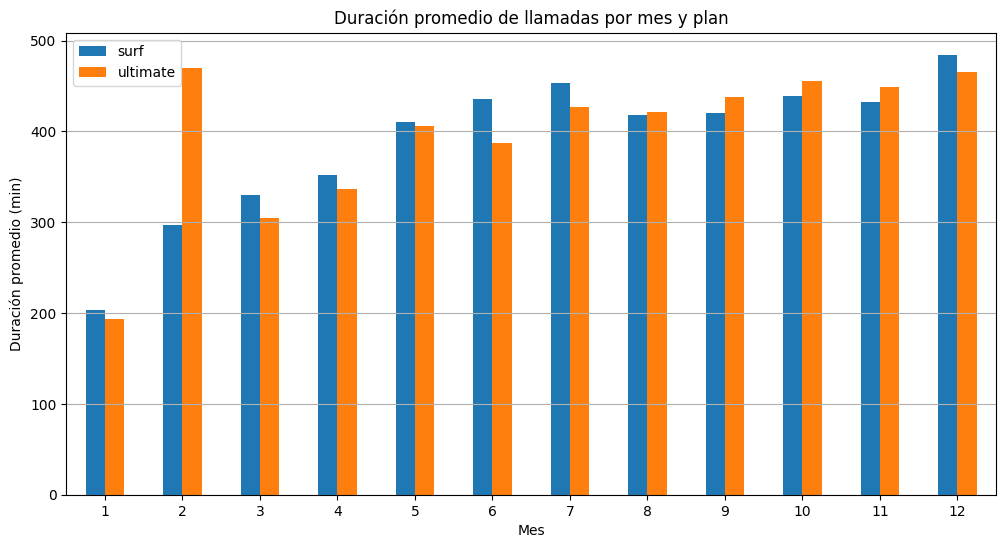

In [37]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

average_call_duration = monthly_income.groupby(['month', 'plan_name'])['call_duration'].mean().unstack(level='plan_name')

average_call_duration.plot(kind='bar', figsize=(12, 6))

plt.xlabel('Mes')
plt.ylabel('Duración promedio (min)')
plt.title('Duración promedio de llamadas por mes y plan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-')
plt.legend()
plt.show()

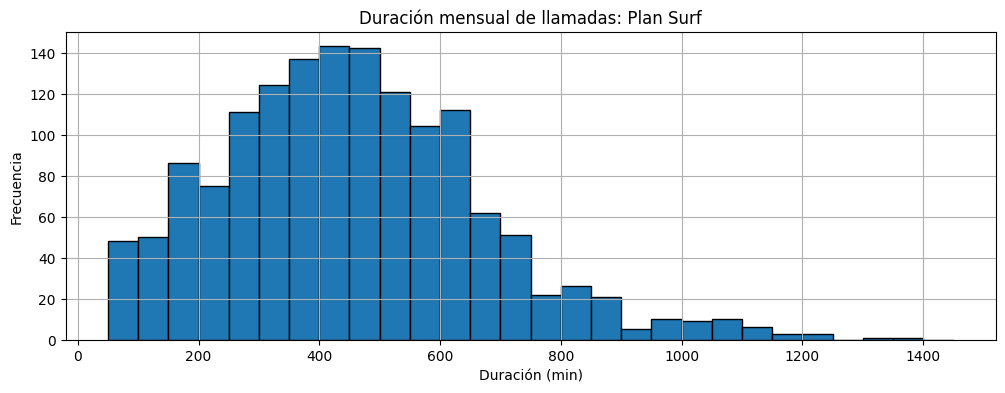

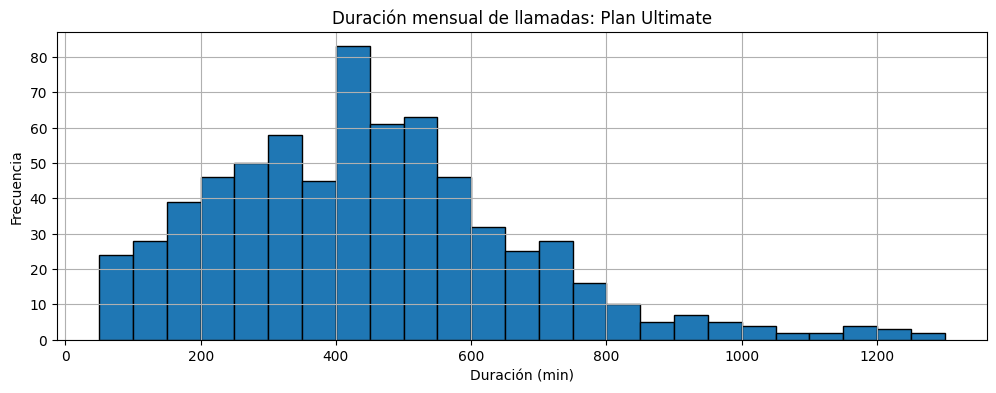

In [38]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
calls_surf = monthly_income[monthly_income['plan_name'] == 'surf']['call_duration']

calls_surf.plot(kind='hist', figsize=[12, 4], edgecolor='black', bins=[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450])

plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')
plt.title('Duración mensual de llamadas: Plan Surf')
plt.grid()
plt.show()

calls_ultimate = monthly_income[monthly_income['plan_name'] == 'ultimate']['call_duration']

calls_ultimate.plot(kind='hist', figsize=[12, 4], edgecolor='black', bins=[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300])

plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')
plt.title('Duración mensual de llamadas: Plan Ultimate')
plt.grid()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [39]:
# Calcula la media y la varianza de la duración mensual de llamada por plan
monthly_call_duration_mean = monthly_income.groupby('plan_name')['call_duration'].mean().round(2)
print('Duración promedio mensual de llamadas:', monthly_call_duration_mean)
print()
monthly_call_duration_var = monthly_income.groupby('plan_name')['call_duration'].var().round(2)
print('Variación de la duración mensual de llamadas:', monthly_call_duration_var)

Duración promedio mensual de llamadas: plan_name
surf        436.52
ultimate    434.68
Name: call_duration, dtype: float64

Variación de la duración mensual de llamadas: plan_name
surf        52571.06
ultimate    56573.63
Name: call_duration, dtype: float64


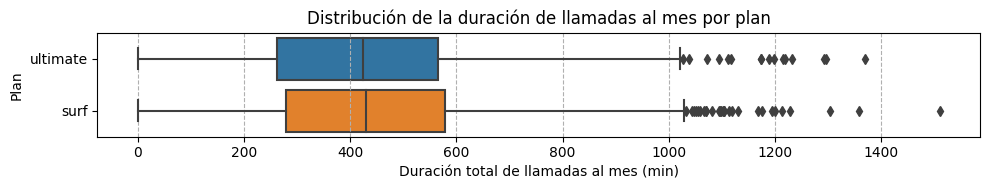

In [40]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas por plan
plt.figure(figsize=(10, 2))
sns.boxplot(x='call_duration', y='plan_name', data=monthly_income)
plt.xlabel('Duración total de llamadas al mes (min)')
plt.ylabel('Plan')
plt.title('Distribución de la duración de llamadas al mes por plan')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

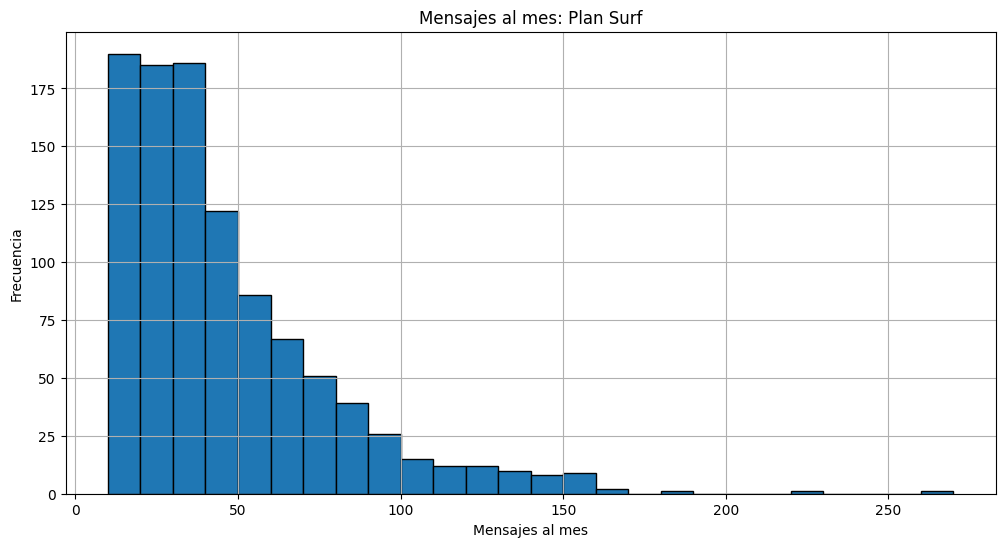

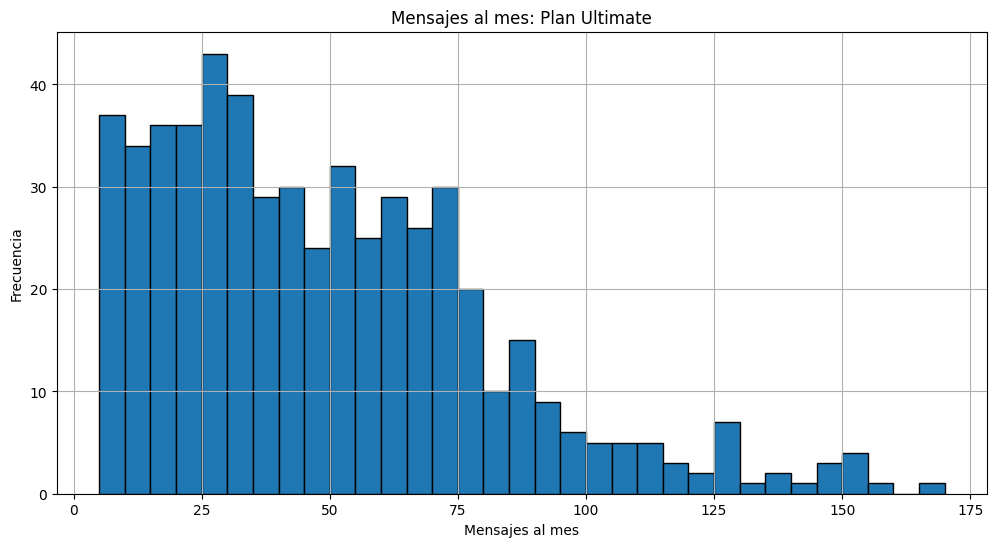

In [41]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_surf = monthly_income[monthly_income['plan_name'] == 'surf']['message_count']

messages_surf.plot(kind='hist', figsize=[12, 6], edgecolor='black', bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270])

plt.xlabel('Mensajes al mes')
plt.ylabel('Frecuencia')
plt.title('Mensajes al mes: Plan Surf')
plt.grid()
plt.show()

messages_ultimate = monthly_income[monthly_income['plan_name'] == 'ultimate']['message_count']

messages_ultimate.plot(kind='hist', figsize=[12, 6], edgecolor='black', bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170])

plt.xlabel('Mensajes al mes')
plt.ylabel('Frecuencia')
plt.title('Mensajes al mes: Plan Ultimate')
plt.grid()
plt.show()

In [42]:
# Calculo de la media y la varianza de los mensajes enviados al mes por plan
monthly_message_count_mean = monthly_income.groupby('plan_name')['message_count'].mean().round(2)
print('Promedio de mensajes enviados al mes:', monthly_message_count_mean)
print()
monthly_message_count_var = monthly_income.groupby('plan_name')['message_count'].var().round(2)
print('Varianza de mensajes enviados al mes:', monthly_message_count_var)

Promedio de mensajes enviados al mes: plan_name
surf        30.90
ultimate    37.73
Name: message_count, dtype: float64

Varianza de mensajes enviados al mes: plan_name
surf        1131.95
ultimate    1210.14
Name: message_count, dtype: float64


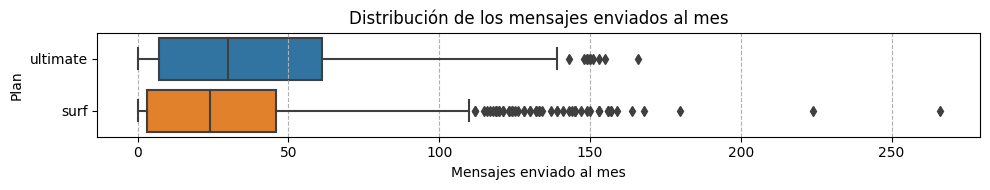

In [43]:
# Diagrama de caja para visualizar la distribución de los mensajes enviados al mes por plan
plt.figure(figsize=(10, 2))
sns.boxplot(x='message_count', y='plan_name', data=monthly_income)
plt.xlabel('Mensajes enviado al mes')
plt.ylabel('Plan')
plt.title('Distribución de los mensajes enviados al mes')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

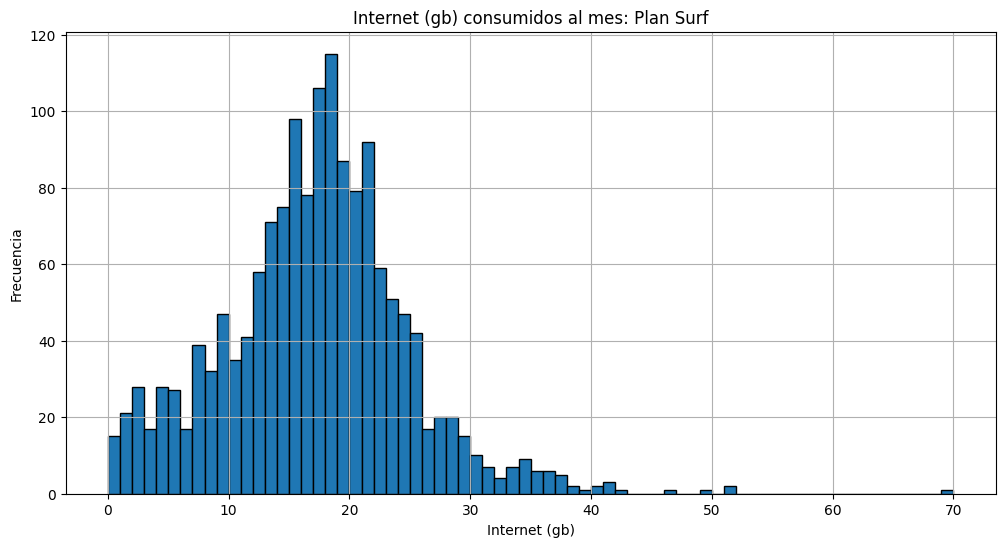

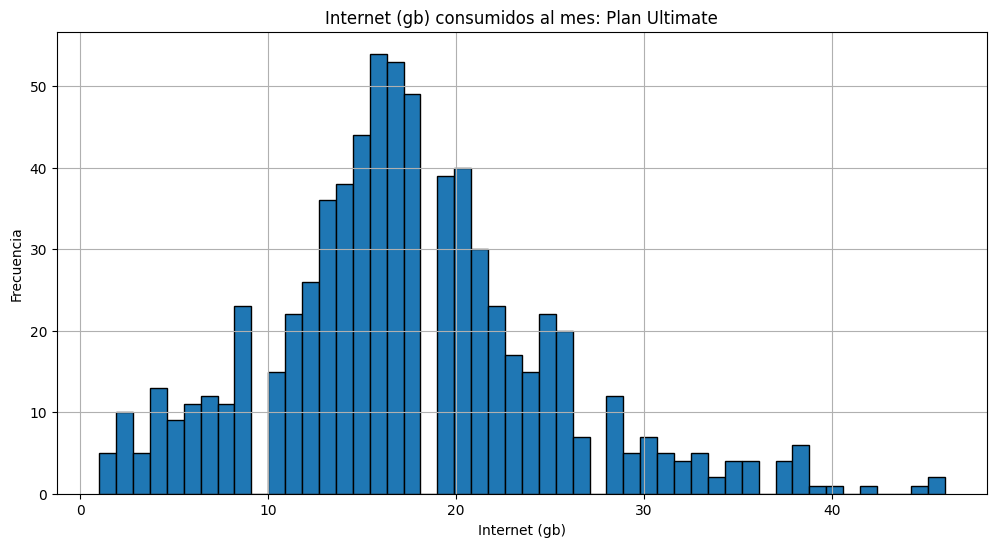

In [44]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_surf = monthly_income[monthly_income['plan_name'] == 'surf']['gb_used']

internet_surf.plot(kind='hist', figsize=[12, 6], edgecolor='black', bins=70)

plt.xlabel('Internet (gb)')
plt.ylabel('Frecuencia')
plt.title('Internet (gb) consumidos al mes: Plan Surf')
plt.grid()
plt.show()

internet_ultimate = monthly_income[monthly_income['plan_name'] == 'ultimate']['gb_used']

internet_ultimate.plot(kind='hist', figsize=[12, 6], edgecolor='black', bins=50)

plt.xlabel('Internet (gb)')
plt.ylabel('Frecuencia')
plt.title('Internet (gb) consumidos al mes: Plan Ultimate')
plt.grid()
plt.show()

In [45]:
# Calculo de la media y la varianza de tráfico de internet al mes por plan
monthly_gb_used_mean = monthly_income.groupby('plan_name')['gb_used'].mean().round(2)
print('Promedio de gb consumidos al mes:', monthly_gb_used_mean)
print()
monthly_gb_used_var = monthly_income.groupby('plan_name')['gb_used'].var().round(2)
print('Varianza de gb consumidos al mes:', monthly_gb_used_var)

Promedio de gb consumidos al mes: plan_name
surf        16.63
ultimate    17.40
Name: gb_used, dtype: float64

Varianza de gb consumidos al mes: plan_name
surf        59.18
ultimate    57.57
Name: gb_used, dtype: float64


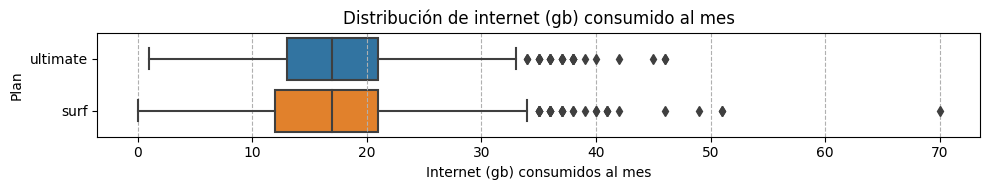

In [46]:
# Diagrama de caja para visualizar la distribución del tráfico de interés al mes por plan
plt.figure(figsize=(10, 2))
sns.boxplot(x='gb_used', y='plan_name', data=monthly_income)
plt.xlabel('Internet (gb) consumidos al mes')
plt.ylabel('Plan')
plt.title('Distribución de internet (gb) consumido al mes')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

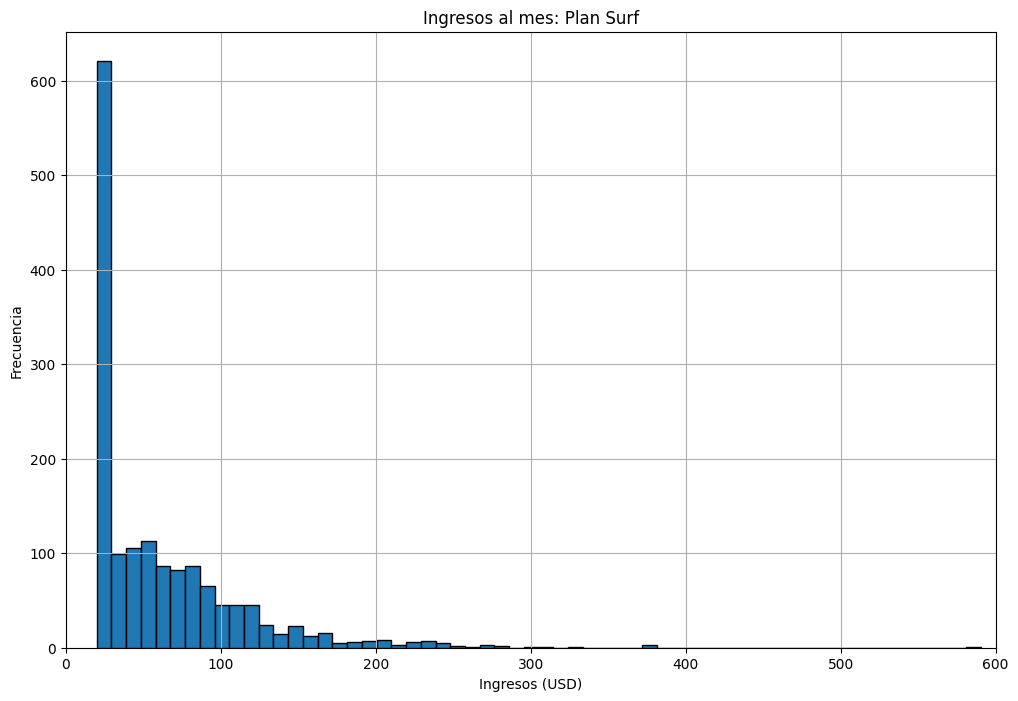

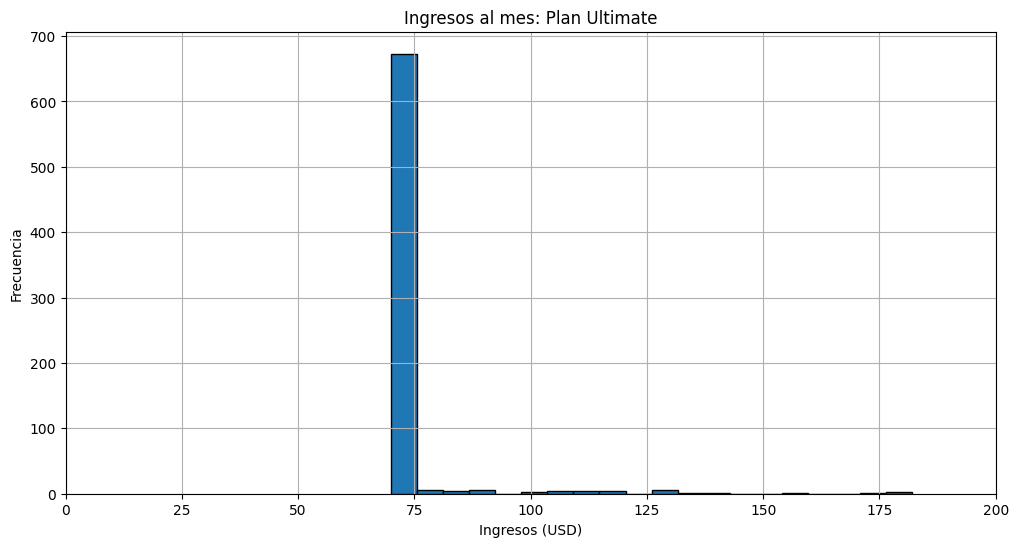

In [47]:
income_surf = monthly_income[monthly_income['plan_name'] == 'surf']['final_cost']

income_surf.plot(kind='hist', figsize=[12, 8], edgecolor='black', bins=60)

plt.xlabel('Ingresos (USD)')
plt.ylabel('Frecuencia')
plt.title('Ingresos al mes: Plan Surf')
plt.grid()
plt.xlim([0, 600])
plt.show()

income_ultimate = monthly_income[monthly_income['plan_name'] == 'ultimate']['final_cost']

income_ultimate.plot(kind='hist', figsize=[12, 6], edgecolor='black', bins=20)

plt.xlabel('Ingresos (USD)')
plt.ylabel('Frecuencia')
plt.title('Ingresos al mes: Plan Ultimate')
plt.grid()
plt.xlim([0, 200])
plt.show()

In [48]:
income_stats_per_plan = monthly_income.groupby('plan_name')['final_cost'].describe().round(2)
print("Descripción estadística de los ingresos por plan:")
print()
print(income_stats_per_plan)
print()
print("Ingresos totales por plan (USD):")
print(monthly_income.groupby('plan_name')['final_cost'].sum().round(2))

Descripción estadística de los ingresos por plan:

            count   mean    std   min   25%    50%    75%     max
plan_name                                                        
surf       1545.0  60.22  53.60  20.0  20.0  40.75  80.33  590.37
ultimate    713.0  72.30  11.46  70.0  70.0  70.00  70.00  182.00

Ingresos totales por plan (USD):
plan_name
surf        93033.92
ultimate    51548.00
Name: final_cost, dtype: float64


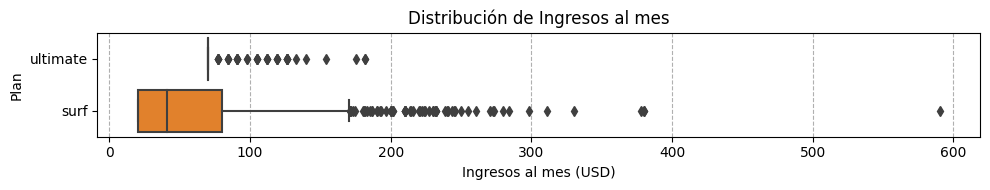

In [49]:
plt.figure(figsize=(10, 2))
sns.boxplot(x='final_cost', y='plan_name', data=monthly_income)
plt.xlabel('Ingresos al mes (USD)')
plt.ylabel('Plan')
plt.title('Distribución de Ingresos al mes')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [56]:
# Prueba las hipótesis

#Ho: Los ingresos promedio procedentes de los usuarios de los planes son iguales
#Hi: Los ingresos promedio procedentes de los usuarios de los planes son distintos

alpha = 0.05
results = st.ttest_ind(income_surf, income_ultimate, equal_var=False)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Se rechaza la hipótesis nula. Los ingresos promedio procedentes de los usuarios de los planes son distintos.')
else:
    print('Se acepta la hipótesis nula. Los ingresos promedio procedentes de los usuarios de los planes son iguales')


valor p: 5.810806023989452e-17
Se acepta la hipótesis nula. Los ingresos promedio procedentes de los usuarios de los planes son distintos.



<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta:</b>

Se corrrije, por favor revisar si quedó bien.<a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [57]:
# Prueba las hipótesis

monthly_income_ny_nj = pd.merge(monthly_income, users, on='user_id', how='left')

def assign_region(city):
    if 'NY' in city or 'NJ' in city:
        return 'NY-NJ'
    else:
        return 'Other'

monthly_income_ny_nj['region'] = monthly_income_ny_nj['city'].apply(assign_region)

ny_nj_income = monthly_income_ny_nj[monthly_income_ny_nj['region'] == 'NY-NJ']['final_cost']
other_regions_income = monthly_income_ny_nj[monthly_income_ny_nj['region'] == 'Other']['final_cost']

#Ho: El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones
#Hi: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

alpha = 0.05
results = st.ttest_ind(ny_nj_income, other_regions_income, equal_var=False)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Se rechaza la hipótesis nula. El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.')
else:
    print('Se acepta la hipótesis nula. El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones')


valor p: 0.06619653624647975
Se acepta la hipótesis nula. El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones



<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta:</b>

Se corrrije, por favor revisar si quedó bien.<a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Sigue disfrutando los siguientes cursos!

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Existe diferencia entre los ingresos del plan Surf y Ultimate.
Aunque los ingresos promedio del plan Ultimate tiene una media superior a los ingresos promedio del plan Surf, en el plan Surf existe una  variación hasta 5 veces mayor debido a que hay mas excesos calculados, aumentando así la tafira final que el usuario debe pagar.
La cantidad de usuarios que utilizan el plan Surf es mayor al plan Ultimate.
Existen más ingresos a través del plan Surf que el plan Ultimate:
- Surf: 93033.92 USD
- Últimate: 51548.00 USD

<div class="alert alert-block alert-info">
Se actualizan las cifras en las conclusiones dado que cambiaron por los redondeos realizados anteriormente.<a class="tocSkip"></a>